In [1]:
from coupled_dipole_model import Sphere_Polarizability
from coupled_dipole_model import CrossSections
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]


## Single Sphere
Here we see that the coupled dipole model holds very well for a sphere with radius 50 nm or less. Once above 50 nm, the quadrupole begins growing in. By 90 nm sphere, the quadrupole peak is of higher intensity than the dipole. 

In [2]:
num_part_per_struct = 1
w_all = np.arange(2,3,.01)/hbar_eVs
num_freq = len(w_all)
gap = np.array([0])
num_gap = len(gap)
all_poss_radii = np.array([10, 20, 30, 40, 50]) 
num_radii = len(all_poss_radii) 

def_centers = np.zeros((num_radii, num_gap, num_freq, num_part_per_struct, 3)) 
def_all_radii = np.zeros((num_radii, num_gap, num_freq, num_part_per_struct)) 

count_radii = 0
for i in range(0, num_radii):
    def_all_radii[count_radii,:,:,0] = all_poss_radii[i]*1.E-7
    count_radii = count_radii + 1
    
for gap_i in range(0, num_gap):
    for radii_i in range(0, num_radii):
        which_radii_0 = def_all_radii[radii_i, 0, 0, 0]*1.E7
        def_centers[radii_i,gap_i, :, 0,:] = np.array([ 0, 0, -which_radii_0-gap[gap_i]/2 ])*1.E-7



In [3]:
calc_dips = CrossSections(centers=def_centers, 
                                   all_radii=def_all_radii,
                                   w=w_all,
                                   num=num_part_per_struct, 
                                   n=1.0, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs)    

Pext, Pabs = calc_dips.cross_sects(drive=np.array([0,0,1]))

(2.0, 3.0)

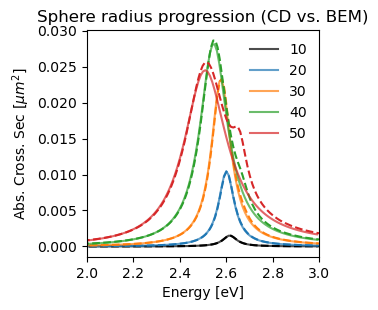

In [4]:
fig = plt.figure(figsize=(3.,3.), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1, 1, 1)
colorscheme = ['black', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
pick_color = 0
 
for which_radii in range(0, num_radii):
    radius = int(round(def_all_radii[which_radii,0,0,0]*1E7))    

    plt.plot(w_all*hbar_eVs, Pabs[which_radii, 0, :,0],
             label=radius,
             color=colorscheme[pick_color],
            alpha=.7)
    
    data = loadmat(str('check_with_simulation/single_sphere/Spectrum_sph_ret_')+str(radius)+str('nm_drude_n1.0.mat'))
    energy = data['en_ev'][0]
    abs_cross = data['abs_mcsqrd'][0]
    ext_cross = data['ext_mcsqrd'][0]
    plt.plot(energy, abs_cross,'--', color=colorscheme[pick_color])
    pick_color=pick_color + 1


plt.legend(frameon=False)
plt.title('Sphere radius progression (CD vs. BEM)')
plt.ylabel('Abs. Cross. Sec [$\mu m^2$]')
plt.xlabel('Energy [eV]')
plt.xlim([2,3])

## Sphere dimer

In [7]:
num_part_per_struct = 2
w_all = np.arange(2.2,2.81,.008)/hbar_eVs
num_freq = len(w_all)
gap = np.array([10])
num_gap = len(gap)
all_poss_radii = np.array([10, 20]) 
num_radii = len(all_poss_radii)**2

def_centers = np.zeros((num_radii, num_gap, num_freq, num_part_per_struct, 3)) 
def_all_radii = np.zeros((num_radii, num_gap, num_freq, num_part_per_struct)) 

count_radii = 0
for i in range(0, int(np.sqrt(num_radii))):
    for j in range(0, int(np.sqrt(num_radii))):
        def_all_radii[count_radii,:,:,0] = all_poss_radii[i]*1.E-7
        def_all_radii[count_radii,:,:,1] = all_poss_radii[j]*1.E-7
        count_radii = count_radii + 1
    
for gap_i in range(0, num_gap):
    for radii_i in range(0, num_radii):
        which_radii_0 = def_all_radii[radii_i, 0, 0, 0]*1.E7
        def_centers[radii_i,gap_i, :, 0,:] = np.array([ 0, 0, -which_radii_0-gap[gap_i]/2 ])*1.E-7
        which_radii_1 = def_all_radii[radii_i, 0, 0, 1]*1.E7
        def_centers[radii_i,gap_i, :, 1,:] = np.array([ 0, 0, which_radii_1+gap[gap_i]/2 ])*1.E-7

        
        
        

calc_dips = CrossSections(centers=def_centers, 
                                   all_radii=def_all_radii,
                                   w=w_all,
                                   num=num_part_per_struct, 
                                   n=1.0, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs)    

Pext, Pabs = calc_dips.cross_sects(drive=np.array([0,0,1]))

Radii 10 20 gap 10


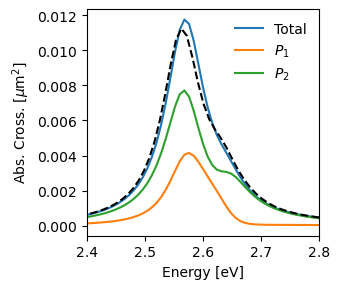

In [8]:
fig = plt.figure(figsize=(3.,3.), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1, 1, 1)

def make_plot(which_ax, which_gap, which_radii_combo, all_or_part,pick_color):
    radii_1 = int(round(def_all_radii[which_radii_combo,which_gap,0,0]*1E7))
    radii_2 = int(round(def_all_radii[which_radii_combo,which_gap,0,1]*1E7))
    
    part1 = def_centers[which_radii_combo, which_gap, 0, 0,:]*1E7
    part2 = def_centers[which_radii_combo, which_gap, 0, 1,:]*1E7

    gap_str = int(round(np.linalg.norm(part2-part1)-radii_1-radii_2))
#     labelname = str(radii_1)+str("-")+str(radii_2) + str(' gap ')+str(gap_str)
    labelname = str(gap_str)+ str(" nm")
    if all_or_part == 'all':
        which_ax.plot(w_all*hbar_eVs, Pabs[which_radii_combo, which_gap,:,1]+Pabs[which_radii_combo, which_gap, :,0],label='Total')
        which_ax.plot(w_all*hbar_eVs, Pabs[which_radii_combo, which_gap,:,0],label='$P_1$')
        which_ax.plot(w_all*hbar_eVs, Pabs[which_radii_combo, which_gap,:,1],label='$P_2$')
    if all_or_part == 'just_tot':
        which_ax.plot(w_all*hbar_eVs, Pabs[which_radii_combo, which_gap,:,1]+Pabs[which_radii_combo, which_gap, :,0],label=labelname,alpha=.5)

        
        
    data = loadmat(str('check_with_simulation/sphere_heterodimer/Spectrum_sph_ret_gap')+str(gap_str)+str('nm_')+str(radii_1)+str('-')+str(radii_2)+str('nm_drude_n1.0.mat'))

    energy = data['en_ev'][0]
    abs_cross = data['abs_mcsqrd'][0]
    ext_cross = data['ext_mcsqrd'][0]
    which_ax.plot(energy, abs_cross,'--', color=colorscheme[pick_color])

    which_ax.legend(frameon=False)
    which_ax.set_xlim([2.4, 2.8])
    which_ax.set_xlabel('Energy [eV]')
    which_ax.set_ylabel('Abs. Cross. [$\mu$m$^2$]')
    return print('Radii', radii_1, radii_2, 'gap', gap_str)
    
    
    
make_plot(which_ax=ax1, which_gap=0, which_radii_combo=1, all_or_part='all',pick_color=0)

In [ ]:
fig = plt.figure(figsize=(6.,3.), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

colorscheme = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']




pick_color=0

for which_gap in range(0, len(gap)):
    which_radii_comb = 0
    radii_1 = int(round(def_all_radii[which_radii_comb,0,0,0]*1E7))
    radii_2 = int(round(def_all_radii[which_radii_comb,0,0,1]*1E7))
    
    print('1', radii_1, radii_2)

    part1 = def_centers[which_radii_comb, which_gap, 0, 0,:]*1E7
    part2 = def_centers[which_radii_comb, which_gap, 0, 1,:]*1E7

    gap_str = int(round(np.linalg.norm(part2-part1)-radii_1-radii_2))
#     labelname = str(radii_1)+str("-")+str(radii_2) + str(' gap ')+str(gap_str)
    labelname = str(gap_str)+ str(" nm")

    ax1.plot(w_all*hbar_eVs, Pabs[which_radii_comb, which_gap,:,1]+Pabs[which_radii_comb, which_gap, :,0],label=labelname,alpha=.5)


    data = loadmat(str('check_with_simulation/sphere_heterodimer/Spectrum_sph_ret_gap')+str(gap_str)+str('nm_')+str(radii_1)+str('-')+str(radii_2)+str('nm_drude_n1.0.mat'))

    energy = data['en_ev'][0]
    abs_cross = data['abs_mcsqrd'][0]
    ext_cross = data['ext_mcsqrd'][0]
    ax1.plot(energy, abs_cross,'--', color=colorscheme[pick_color])
    pick_color=pick_color + 1

    ax1.legend(frameon=False)
    #     ax1.title('Sphere radius progression (CD vs. BEM)')
    
#############################################################################  
pick_color=0

for which_gap in range(0, len(gap)):
    which_radii_comb = 2
    radii_1 = int(round(def_all_radii[which_radii_comb,0,0,0]*1E7))
    radii_2 = int(round(def_all_radii[which_radii_comb,0,0,1]*1E7))
    print('2', radii_1, radii_2)

    part1 = def_centers[which_radii_comb, which_gap, 0, 0,:]*1E7
    part2 = def_centers[which_radii_comb, which_gap, 0, 1,:]*1E7

    gap_str = int(round(np.linalg.norm(part2-part1)-radii_1-radii_2))
#     labelname = str(radii_1)+str("-")+str(radii_2) + str(' gap ')+str(gap_str)
    labelname = str(gap_str)+ str(" nm")

    ax2.plot(w_all*hbar_eVs, Pabs[which_radii_comb, which_gap,:,1]+Pabs[which_radii_comb, which_gap, :,0],label=labelname,alpha=.5)
    data = loadmat(str('check_with_simulation/sphere_heterodimer/Spectrum_sph_ret_gap')+str(gap_str)+str('nm_')+str(radii_1)+str('-')+str(radii_2)+str('nm_drude_n1.0.mat'))

    energy = data['en_ev'][0]
    abs_cross = data['abs_mcsqrd'][0]
    ext_cross = data['ext_mcsqrd'][0]
    ax2.plot(energy, abs_cross,'--', color=colorscheme[pick_color])
    pick_color=pick_color + 1
    ax2.legend(frameon=False)    
    
#############################################################################   
pick_color=0

for which_gap in range(0, len(gap)):
    which_radii_comb = 3
    radii_1 = int(round(def_all_radii[which_radii_comb,0,0,0]*1E7))
    radii_2 = int(round(def_all_radii[which_radii_comb,0,0,1]*1E7))
    print('3', radii_1, radii_2)
    
    part1 = def_centers[which_radii_comb, which_gap, 0, 0,:]*1E7
    part2 = def_centers[which_radii_comb, which_gap, 0, 1,:]*1E7

    gap_str = int(round(np.linalg.norm(part2-part1)-radii_1-radii_2))
    labelname = str(gap_str)+ str(" nm")

    ax3.plot(w_all*hbar_eVs, Pabs[which_radii_comb, which_gap,:,1]+Pabs[which_radii_comb, which_gap, :,0],label=labelname,alpha=.5)
    data = loadmat(str('check_with_simulation/sphere_heterodimer/Spectrum_sph_ret_gap')+str(gap_str)+str('nm_')+str(radii_1)+str('-')+str(radii_2)+str('nm_drude_n1.0.mat'))

    energy = data['en_ev'][0]
    abs_cross = data['abs_mcsqrd'][0]
    ext_cross = data['ext_mcsqrd'][0]
    ax3.plot(energy, abs_cross,'--', color=colorscheme[pick_color])
    pick_color=pick_color + 1
    ax3.legend(frameon=False) 
    
#############################################################################   

ax1.set_ylabel('Abs-. Cross. Sec [$\mu m^2$]')
ax1.set_xlabel('Energy [eV]')
ax1.set_xlim([2.4,2.7])  
ax1.set_title("10-10")

ax2.set_xlabel('Energy [eV]')
ax2.set_xlim([2.4,2.7])    
ax2.set_title("30-10")

ax3.set_xlabel('Energy [eV]')
ax3.set_xlim([2.4,2.7])    
ax3.set_title("30-30")

plt.subplots_adjust(wspace=.3)    

In [ ]:
fig = plt.figure(figsize=(6.,3.), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

pick_color=0
for which_gap in range(0, len(gap)):
    which_radii_comb = 2
    radii_1 = int(round(def_all_radii[which_radii_comb,0,0,0]*1E7))
    radii_2 = int(round(def_all_radii[which_radii_comb,0,0,1]*1E7))
    print(radii_1, radii_2)
    part1 = def_centers[which_radii_comb, which_gap, 0, 0,:]*1E7
    part2 = def_centers[which_radii_comb, which_gap, 0, 1,:]*1E7

    gap_str = int(round(np.linalg.norm(part2-part1)-radii_1-radii_2))
    labelname = str(gap_str)+ str(" nm")

    ax1.plot(w_all*hbar_eVs, Pabs[which_radii_comb, which_gap,:,1]+Pabs[which_radii_comb, which_gap, :,0],label=labelname,color=colorscheme[pick_color])
    ax2.plot(w_all*hbar_eVs, Pabs[which_radii_comb, which_gap,:,1],linestyle='dashdot',label='10',color=colorscheme[pick_color])
    ax3.plot(w_all*hbar_eVs, Pabs[which_radii_comb, which_gap,:,0],linestyle='dashdot',label='30',color=colorscheme[pick_color])

#     data = loadmat(str('check_with_simulation/sphere_heterodimer/Spectrum_sph_ret_gap')+str(gap_str)+str('nm_')+str(radii_1)+str('-')+str(radii_2)+str('nm_drude_n1.0.mat'))

    energy = data['en_ev'][0]
    abs_cross = data['abs_mcsqrd'][0]
    ext_cross = data['ext_mcsqrd'][0]
#     plt.plot(energy, abs_cross,'--', color=colorscheme[pick_color])
    pick_color=pick_color + 1
    ax1.legend(frameon=False,loc='upper left')
    
ax1.set_xlim([2.2,2.8])    
ax2.set_xlim([2.2,2.8])    
ax3.set_xlim([2.2,2.8])    

ax1.set_ylim([0,0.025])    
ax2.set_ylim([0,0.025])    
ax3.set_ylim([0,0.025])    

  